<a href="https://colab.research.google.com/github/decorouz/DeepLeaning-with-Tensorflow/blob/main/2_0_Classify_newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.0 Classifying Newswires: a multiclass classification example.

In this notebook I practice to build a network to classify Reuters newswires into 46 mutually exclusive topics. Because there are many classes, this problem is an instance of *multiclass classification*; and because each data point should be classified into only one category, the problem is more specifically an instance of *single-label*, *multiclass classification*.

### 2.1 The Reuters Dataset:
A simple and widely used toy dataset for text classification. 
There are 46 different topics. Each topic has at least 10 examples in the training set.

#### 2.11 Loading the Reuters dataset

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


The argument `num_numbers` restricts the data to the 10,000 most frequently occuring word found in the data

In [2]:
# Explore the data
print(f"The total number of training example is {len(train_data)}")
print(f"The total number of testing examples is {len(test_data)}")


The total number of training example is 8982
The total number of testing examples is 2246


In [3]:
print(len(train_data[0]))
print(train_labels[2000])

train_data[0:1]


87
3


array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])],
      dtype=object)

In [4]:
train_labels[0]


3

In [5]:
# Decoding newswires back to test
word_index = reuters.get_word_index()
reverse_index =dict([(value, key) for key, value in word_index.items()])
decoded_newswire = " ".join([reverse_index.get(i - 3, "?") for i in train_data[0]])
decoded_newswire


550378/550378 [==============================] - 1s 1us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

#### 2.12 Preparing the data
Convert the data from list of intergers to tensor of integers


In [21]:
# Encoding the training data
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequence(train_data)
x_test= vectorize_sequence(test_data)

In [40]:

x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
# Encoding the training labels
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [8]:

print(f"The shape of the one hot training labels is {one_hot_train_labels.shape}")
print(f"The label of the first train label is {train_labels[2000]}")
one_hot_train_labels[2000]

The shape of the one hot training labels is (8982, 46)
The label of the first train label is 3


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### 2.13 Building the Network

The number of output class for the model is 46. 
In other to avoid the information bottlenecks; that is where a layerd drops a vital information necessary for the classification problem, we will pick a 64-dimensional layer.

In [9]:
# Define the model
from keras import models
from keras import layers 

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

In [10]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

#### 2.14 Validation Approach
Let's set apart 1,000 samples in the training data to use as a validation set.

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
# Training the model for 20 Epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 28ms/step - loss: 2.4919 - accuracy: 0.5361 - val_loss: 1.6839 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.4017 - accuracy: 0.6978 - val_loss: 1.3091 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0549 - accuracy: 0.7794 - val_loss: 1.1478 - val_accuracy: 0.7430
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8420 - accuracy: 0.8217 - val_loss: 1.0387 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6759 - accuracy: 0.8542 - val_loss: 0.9732 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5448 - accuracy: 0.8834 - val_loss: 0.9336 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4431 - accuracy: 0.9093 - val_loss: 0.9166 - val_accuracy: 0.8050
Epoch 8/20
16

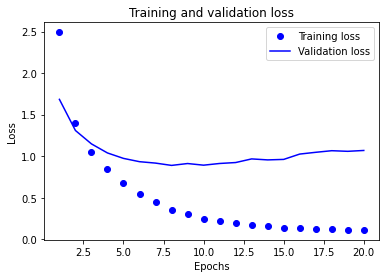

In [17]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

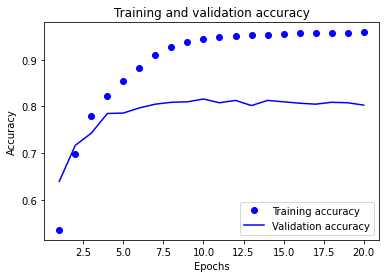

In [19]:
# Plotting the training and validation accuracy
# Plotting the training and validation loss
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The network begin to overfit after the nine epochs. Let's train a new network from scratch for nine epoch and the evaluate it on the test set

#### 2.15 Retraining a model from scratch

In [28]:

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))


model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/9
16/16 [==============================] - 1s 27ms/step - loss: 2.6938 - accuracy: 0.5258 - val_loss: 1.7434 - val_accuracy: 0.6510
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.4234 - accuracy: 0.7027 - val_loss: 1.3298 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.0565 - accuracy: 0.7717 - val_loss: 1.1603 - val_accuracy: 0.7560
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8367 - accuracy: 0.8224 - val_loss: 1.0431 - val_accuracy: 0.7730
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6711 - accuracy: 0.8603 - val_loss: 0.9936 - val_accuracy: 0.7920
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5442 - accuracy: 0.8875 - val_loss: 0.9181 - val_accuracy: 0.8220
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4438 - accuracy: 0.9118 - val_loss: 0.8992 - val_accuracy: 0.8190
Epoch 8/9
16/16 [===

In [29]:
results

[0.9868868589401245, 0.7845057845115662]

This approach reaches an accuracyof ~79%. 

#### 2.16 Generating predictions on new data


In [31]:
predictions = model.predict(x_test)

# Each entry in predictions is a vector of length 46
predictions[0].shape

# The coefficients in this vector sum to 1:
np.sum(predictions[0])


# The largest entry if the predicted class -- the clas with highest probabilty
np.argmax(predictions[1])


71/71 [==============================] - 0s 4ms/step


10

#### 2.17 Further Experiments
* Try using larger or smaller layers: 32 units and 128 units
* Try a single hidden layer or threee

Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 2.2137 - accuracy: 0.5710 - val_loss: 1.3995 - val_accuracy: 0.6800
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1201 - accuracy: 0.7509 - val_loss: 1.1364 - val_accuracy: 0.7550
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 0.7838 - accuracy: 0.8326 - val_loss: 1.0038 - val_accuracy: 0.7880
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5670 - accuracy: 0.8810 - val_loss: 0.9136 - val_accuracy: 0.8100
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4209 - accuracy: 0.9142 - val_loss: 0.9114 - val_accuracy: 0.8110
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.3207 - accuracy: 0.9300 - val_loss: 0.8792 - val_accuracy: 0.8290
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.2448 - accuracy: 0.9432 - val_loss: 0.9663 - val_accuracy: 0.8010
Epoch 8/20
16

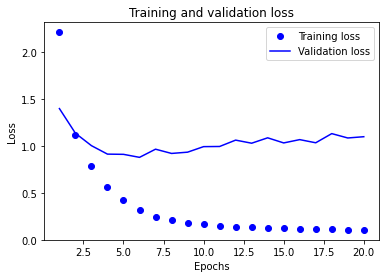

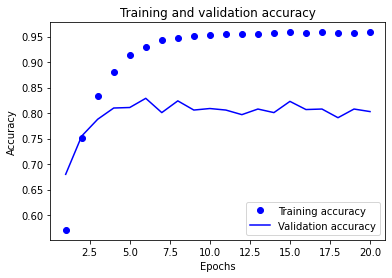

In [48]:
# 32 units
model = models.Sequential()
model.add(layers.Dense(128, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))


model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plotting the training and validation accuracy
# Plotting the training and validation loss
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [49]:

results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 1.3069 - accuracy: 0.7907


In [47]:
predictions = model.predict(x_test)
# The largest entry if the predicted class -- the clas with highest probabilty
np.argmax(predictions[0])

71/71 [==============================] - 0s 2ms/step


3